# **Model ResNetv2**

In [1]:
!pip install keras
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras.applications import ResNet152V2

pretrained = ResNet152V2()

pretrained.summary()

242745792/242745792 [==============================] - 2s 0us/step
Model: "resnet152v2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 114, 114, 64)         0         ['conv1_conv[0][0]']          
                     

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.635993 to fit



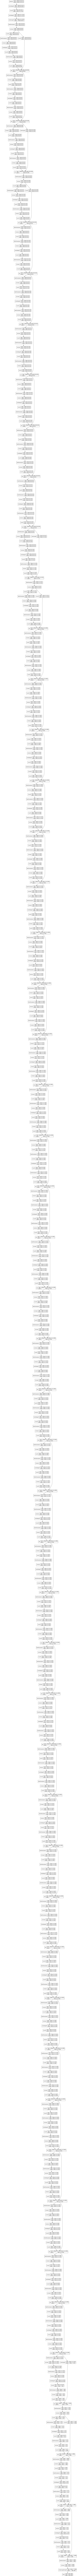

In [2]:
plot_model(pretrained, to_file='ResNetv2.png', show_shapes=True, show_layer_names=False, rankdir='TB', expand_nested=False, dpi=80)

# **Split Dataset**

In [3]:
pip install split-folders

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
path_dataset = '/content/drive/MyDrive/Capstone_Dataset'

In [7]:
import splitfolders

splitfolders.ratio(path_dataset, output='/content/drive/MyDrive/Capstone_Dataset/data',
    seed=1337, ratio=(.9, .1), group_prefix=None, move=False)

Copying files: 780 files [00:28, 26.91 files/s]


In [8]:
import os

base_dir = '/content/drive/MyDrive/Capstone_Dataset/data'

train_dir = os.path.join(base_dir, 'train')
os.chdir(base_dir)
os.rename("val","test")
test_dir = os.path.join(base_dir, 'test')

train_benign = '/content/drive/MyDrive/Capstone_Dataset/data/train/benign'
train_malignant = '/content/drive/MyDrive/Capstone_Dataset/data/train/malignant'
train_normal = '/content/drive/MyDrive/Capstone_Dataset/data/train/normal'

test_benign = '/content/drive/MyDrive/Capstone_Dataset/data/test/benign'
test_malignant = '/content/drive/MyDrive/Capstone_Dataset/data/test/malignant'
test_normal = '/content/drive/MyDrive/Capstone_Dataset/data/test/normal'

print('Total Train Images:', len(os.listdir(train_benign))+
                            len(os.listdir(train_malignant))+
                            len(os.listdir(train_normal))
                            )
print('Total Test Images:', len(os.listdir(test_benign))+
                           len(os.listdir(test_malignant))+
                           len(os.listdir(test_normal)))

Total Train Images: 701
Total Test Images: 79


# **Data Processing**

In [10]:
import tensorflow as tf
import keras.preprocessing
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')
from google.colab import drive

<ipython-input-10-e00caa2e7520>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


In [11]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
base_dir = '/content/drive/MyDrive/Capstone_Dataset/data'

#Define the training data directory
train_dir = os.path.join(base_dir, 'train')

train_benign = train_dir+'/benign'
train_malignant = train_dir+'/malignant'
train_normal = train_dir+'/normal'

#Define the training data directory
test_dir = os.path.join(base_dir, 'test')

test_benign = test_dir+'/benign'
test_malignant =test_dir+'/malignant'
test_normal = test_dir+'/normal'

#Calculate total train data
print('Total train images:', len(os.listdir(train_benign))+
                            len(os.listdir(train_malignant))+
                            len(os.listdir(train_normal))
                            )
#Calculate total traing data
print('Total test images:', len(os.listdir(test_benign))+
                           len(os.listdir(test_malignant))+
                           len(os.listdir(test_normal)))

Total train images: 701
Total test images: 79


# **Data Processing**

**Set the Images Size and Batch Size**

In [13]:
image_height = 224
image_width = 224
batch_size = 16

**Resize the Images Size to 224x224**

In [14]:
data_train = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  image_size=(image_height, image_width)
)

Found 701 files belonging to 3 classes.


In [15]:
class_names = data_train.class_names
print(class_names)

['benign', 'malignant', 'normal']


**Images Visualization of Dataset**

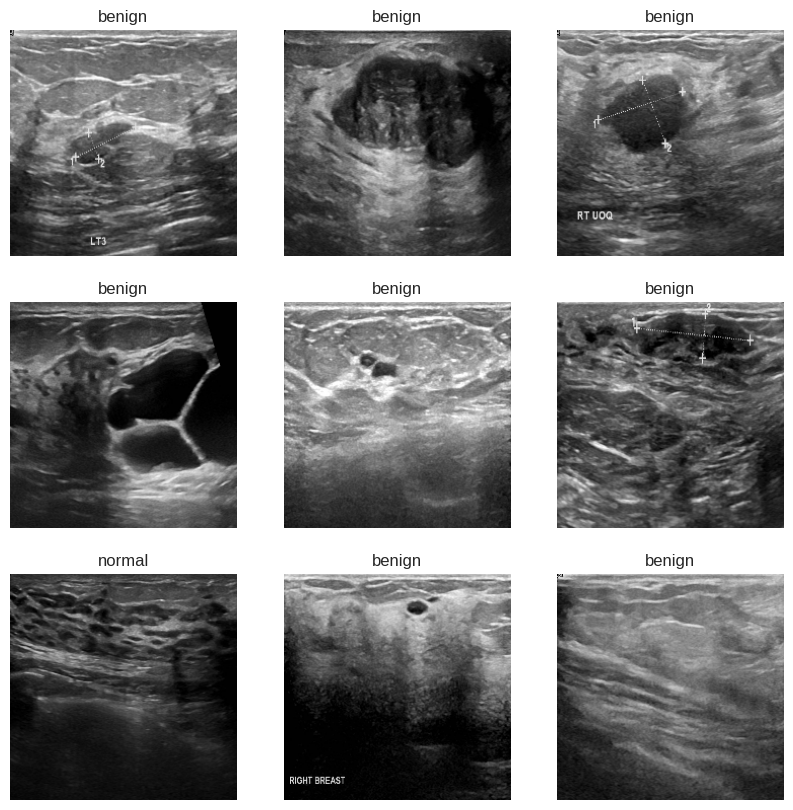

In [16]:
plt.figure(figsize=(10, 10))
for images, labels in data_train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [17]:
data_test = tf.keras.preprocessing.image_dataset_from_directory(
  test_dir,
  image_size=(image_height, image_width)
)

Found 79 files belonging to 3 classes.


In [18]:
class_names = data_test.class_names
class_names

['benign', 'malignant', 'normal']

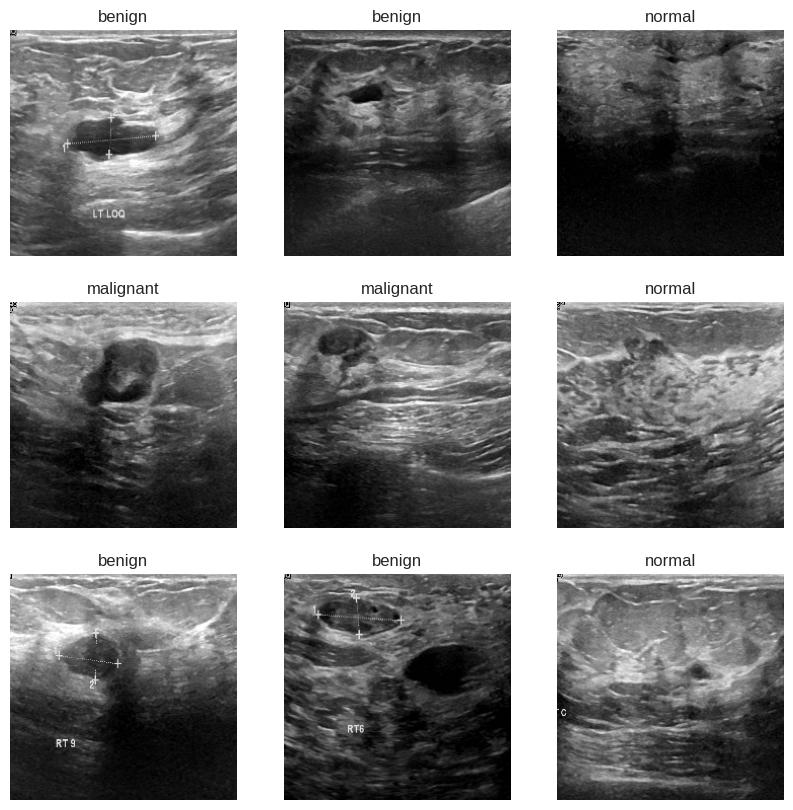

In [19]:
plt.figure(figsize=(10, 10))
for images, labels in data_test.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

**Augmentation**

In [20]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range = 10,
    shear_range=0.2,
    zoom_range=0.2,
    brightness_range=[0.4,1.5],
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode = 'nearest',
    validation_split=0.15
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.15
)
test_datagen = ImageDataGenerator(rescale=1./255)

**Divide the Datagen for Train, Validation, and Test Data**

In [21]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_height,image_width),
    class_mode='categorical',
    batch_size= batch_size,
    subset='training',
    seed = 123,
    shuffle=True
)

validation_generator = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(image_height,image_width),
    class_mode='categorical',
    batch_size= batch_size,
    subset='validation',
    seed = 123,
    shuffle = False
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(image_height,image_width),
    class_mode='categorical',
    batch_size= batch_size,
    seed = 123,
    shuffle = False
)

Found 598 images belonging to 3 classes.
Found 103 images belonging to 3 classes.
Found 79 images belonging to 3 classes.


In [22]:
from sklearn.utils import class_weight
import numpy as np
from sklearn.utils import compute_class_weight

train_classes = train_generator.classes
class_weights = compute_class_weight(class_weight = "balanced",
                                     classes = np.unique(train_classes),
                                     y = train_classes
                                    )
class_weights = dict(zip(np.unique(train_classes), class_weights))
class_weights

{0: 0.5950248756218905, 1: 1.2380952380952381, 2: 1.9542483660130718}

# **CNN Architecture Design**

In [23]:
from keras import regularizers
tf.keras.backend.clear_session()

from tensorflow.keras.layers import Input
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.regularizers import L2

model = tf.keras.models.Sequential([
    ResNet152V2(weights="imagenet", include_top=False, input_tensor=Input(shape=(image_height, image_width, 3))),
    Conv2D(512, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.5),
    Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.5),
    Dense(3, activation='softmax')
])
model.layers[0].trainable = False
model.summary()

234545216/234545216 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152v2 (Functional)    (None, 7, 7, 2048)        58331648  
                                                                 
 conv2d (Conv2D)             (None, 5, 5, 512)         9437696   
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 2, 2, 512)         0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               

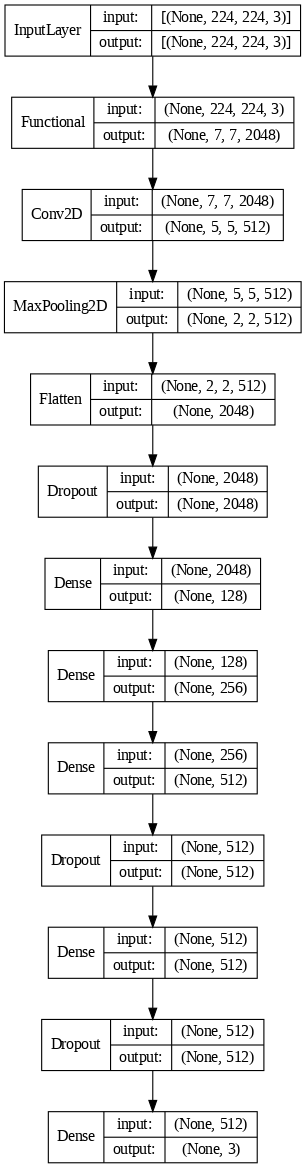

In [24]:
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False, rankdir='TB', expand_nested=False, dpi=80)

# **Model Training**

**Compiling the Model**

In [25]:
import keras

model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', keras.metrics.SpecificityAtSensitivity(0.5), keras.metrics.SensitivityAtSpecificity(0.5)]
)

**Callbacks**

In [26]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    min_lr=0.001
)

In [27]:
  def scheduler(epoch, lr):
    if epoch < 10:
      return lr
    else:
      return lr * tf.math.exp(-0.1)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)

**Training the Model**

In [28]:
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    verbose=1,
    callbacks=[reduce_lr, lr_scheduler],
    shuffle = True
)

Epoch 1/30
38/38 [==============================] - 401s 10s/step - loss: 2.7281 - accuracy: 0.4883 - specificity_at_sensitivity: 0.7366 - sensitivity_at_specificity: 0.7074 - val_loss: 2.0531 - val_accuracy: 0.5631 - val_specificity_at_sensitivity: 0.8058 - val_sensitivity_at_specificity: 0.9320 - lr: 0.0010
Epoch 2/30
38/38 [==============================] - 384s 10s/step - loss: 1.9988 - accuracy: 0.5736 - specificity_at_sensitivity: 0.8420 - sensitivity_at_specificity: 0.8211 - val_loss: 1.8315 - val_accuracy: 0.5825 - val_specificity_at_sensitivity: 0.9175 - val_sensitivity_at_specificity: 0.9320 - lr: 0.0010
Epoch 3/30
38/38 [==============================] - 387s 10s/step - loss: 1.9158 - accuracy: 0.5769 - specificity_at_sensitivity: 0.8512 - sensitivity_at_specificity: 0.8595 - val_loss: 1.6620 - val_accuracy: 0.6117 - val_specificity_at_sensitivity: 0.9806 - val_sensitivity_at_specificity: 0.9709 - lr: 0.0010
Epoch 4/30
38/38 [==============================] - 415s 11s/step -

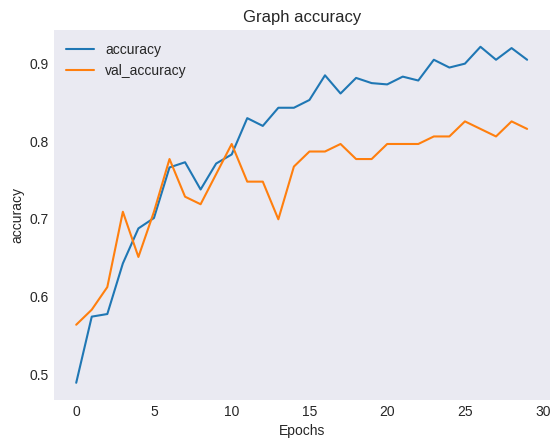

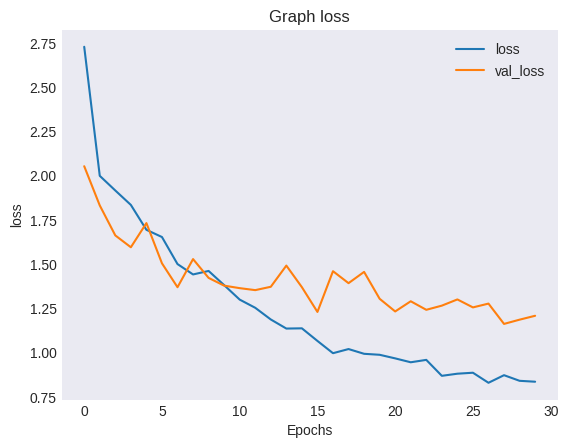

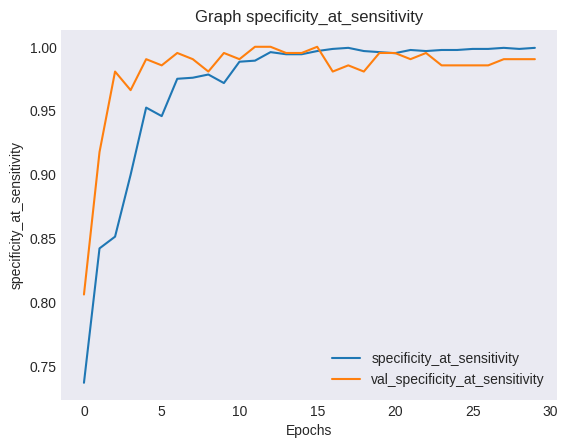

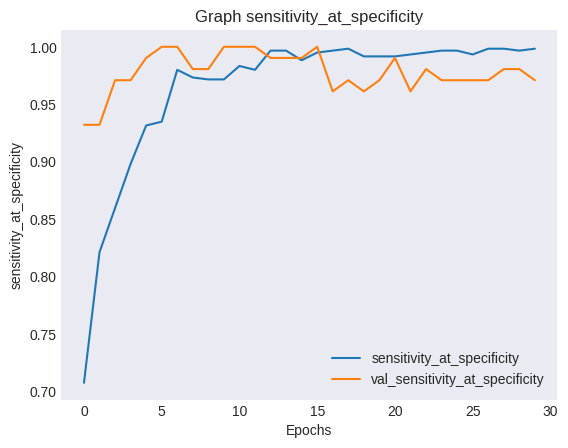

In [29]:
def grafik_plot(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.title('Graph '+string)
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

grafik_plot(history, "accuracy")
grafik_plot(history, "loss")
grafik_plot(history, "specificity_at_sensitivity")
grafik_plot(history, "sensitivity_at_specificity")

In [30]:
true_labels = test_generator.classes
prob_test = model.predict(test_generator)
predictions = prob_test.argmax(axis=1)

print('Real labels: ', true_labels)
print('Prediction labels: ', predictions)

test_model = model.evaluate(test_generator, verbose=1)

5/5 [==============================] - 42s 8s/step
Real labels:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2
 2 2 2 2 2]
Prediction labels:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 2 1 0 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 1 2 1 2 2 2 2 2 2 0 0 2
 2 2 2 1 0]
5/5 [==============================] - 40s 8s/step - loss: 1.1265 - accuracy: 0.7975 - specificity_at_sensitivity: 0.9937 - sensitivity_at_specificity: 0.9747


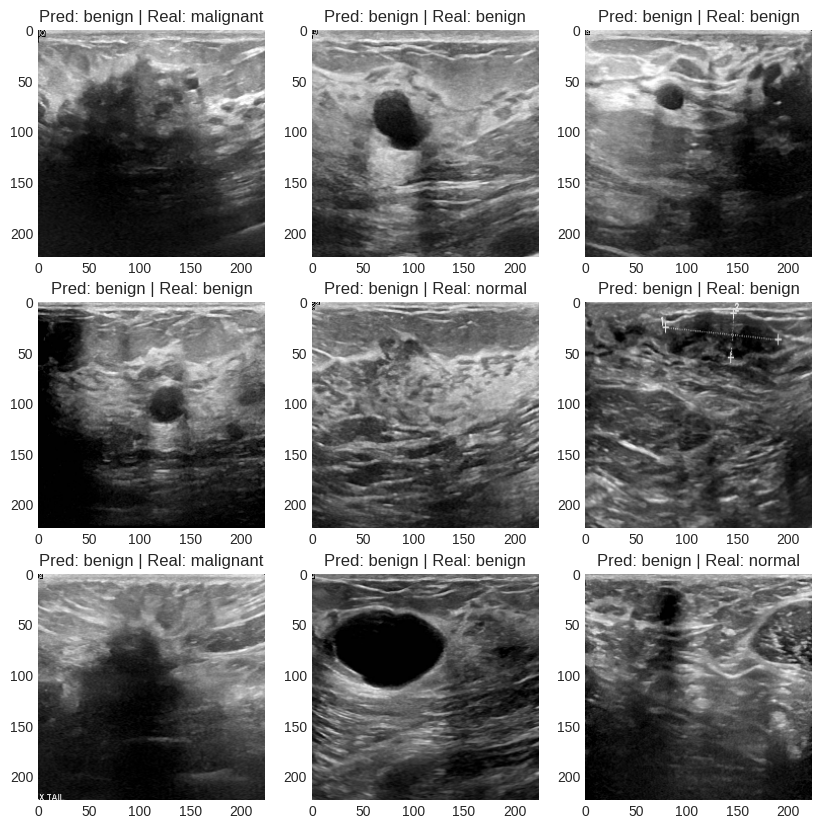

In [48]:
plt.figure(figsize=(10,10))
for images, labels in data_test.take(1):
  classifications = model(images)

  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = np.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

In [49]:
print(test_generator.class_indices)

{'benign': 0, 'malignant': 1, 'normal': 2}


In [50]:
def predict_image(image_upload, model = model):
  im = image_upload
  im_array = np.asarray(im)
  im_array = im_array*(1/225)
  im_input = tf.reshape(im_array, shape = [1, 224, 224, 3])

  predict_array = model.predict(im_input)[0]

  import pandas as pd
  df = pd.DataFrame(predict_array)
  df = df.rename({0:'Probability'}, axis = 'columns')
  kelas = ['benign', 'malignant', 'normal']
  df['Class'] = kelas
  df = df[['Class', 'Probability']]

  predict_label = np.argmax(model.predict(im_input))

  if predict_label == 0:
      predict_class = 'benign'
  elif predict_label == 1:
      predict_class = 'malignant'
  else:
      predict_class = 'normal'

  return predict_class, df

Saving normal (96) - Copy.png to normal (96) - Copy.png
1/1 [==============================] - 0s 495ms/step




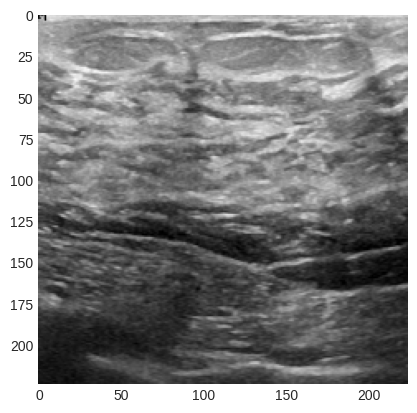


Image recognized as normal


       Class  Probability
0     benign     0.080133
1  malignant     0.003087
2     normal     0.916780




In [51]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(224,224))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  img = np.vstack([x])

label, df = predict_image(img)

print('\n')
plt.show()
print("\nImage recognized as " + label)
print('\n')
print(df)
print('\n')

# **Model Evaluation**

In [37]:
#Evaluation of loss, accuracy, specificity, sensitivity on train data
loss, accuracy, specificity, sensitivity = model.evaluate(train_generator)
print('Train set loss: ', loss)
print('Train set accuracy: ', accuracy)
print('Train set specificity: ', specificity)
print('Train set sensitivity: ', sensitivity)

38/38 [==============================] - 311s 8s/step - loss: 0.7454 - accuracy: 0.9515 - specificity_at_sensitivity: 0.9992 - sensitivity_at_specificity: 0.9983
Train set loss:  0.7453892230987549
Train set accuracy:  0.9515050053596497
Train set specificity:  0.9991638660430908
Train set sensitivity:  0.9983277320861816


In [38]:
#Evaluation of loss, accuracy, specificity, sensitivity on validation data
loss, accuracy, specificity, sensitivity = model.evaluate(train_generator)
print('Validation set loss: ', loss)
print('Validation set accuracy: ', accuracy)
print('Validation set specificity: ', specificity)
print('Validation set sensitivity: ', sensitivity)

38/38 [==============================] - 297s 8s/step - loss: 0.7897 - accuracy: 0.9181 - specificity_at_sensitivity: 0.9992 - sensitivity_at_specificity: 0.9983
Validation set loss:  0.789694607257843
Validation set accuracy:  0.9180601835250854
Validation set specificity:  0.9991638660430908
Validation set sensitivity:  0.9983277320861816


In [39]:
#Evaluation of loss, accuracy, specificity, sensitivity on test data
loss, accuracy, specificity, sensitivity = model.evaluate(train_generator)
print('Test set loss: ', loss)
print('Test set accuracy: ', accuracy)
print('Test set specificity: ', specificity)
print('Test set sensitivity: ', sensitivity)

38/38 [==============================] - 297s 8s/step - loss: 0.7553 - accuracy: 0.9398 - specificity_at_sensitivity: 1.0000 - sensitivity_at_specificity: 1.0000
Test set loss:  0.7553059458732605
Test set accuracy:  0.9397993087768555
Test set specificity:  1.0
Test set sensitivity:  1.0


**Evaluation using Confusion Matrix**

In [40]:
prediction= model.predict(test_generator, steps=np.ceil(test_generator.samples/test_generator.batch_size), verbose=2)
prediction= (prediction > 0.5)
val_labels=test_generator.classes

5/5 - 38s - 38s/epoch - 8s/step


In [41]:
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
  n_classes = cm.shape[0]

  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  ax.set(
      title="Confusion Matrix",
      xlabel="Predicted label",
      ylabel="True label",
      xticks=np.arange(n_classes),
      yticks=np.arange(n_classes),
      xticklabels=labels,
      yticklabels=labels
  )

  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  threshold = (cm.max() + cm.min()) / 2.

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

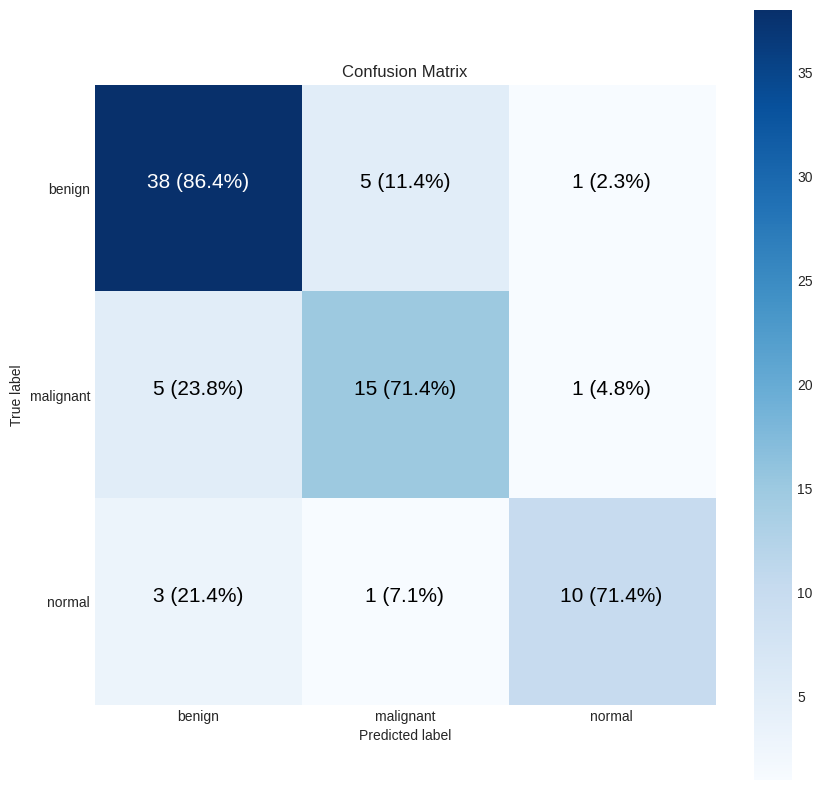

In [42]:
make_confusion_matrix(
    y_true=true_labels,
    y_pred=predictions,
    classes=test_generator.class_indices,
    figsize=(10,10),
    text_size=15
)

In [43]:
from sklearn.metrics import classification_report

num_of_train_samples = 701
num_of_test_samples = 79
batch_size = 32

Y_pred = model.predict(test_generator, num_of_test_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Classification Report')
target_names = list(train_generator.class_indices.keys())
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

5/5 [==============================] - 39s 8s/step
Classification Report
              precision    recall  f1-score   support

      benign       0.83      0.86      0.84        44
   malignant       0.71      0.71      0.71        21
      normal       0.83      0.71      0.77        14

    accuracy                           0.80        79
   macro avg       0.79      0.76      0.78        79
weighted avg       0.80      0.80      0.80        79



# **AUC Visualization**

5/5 [==============================] - 37s 7s/step


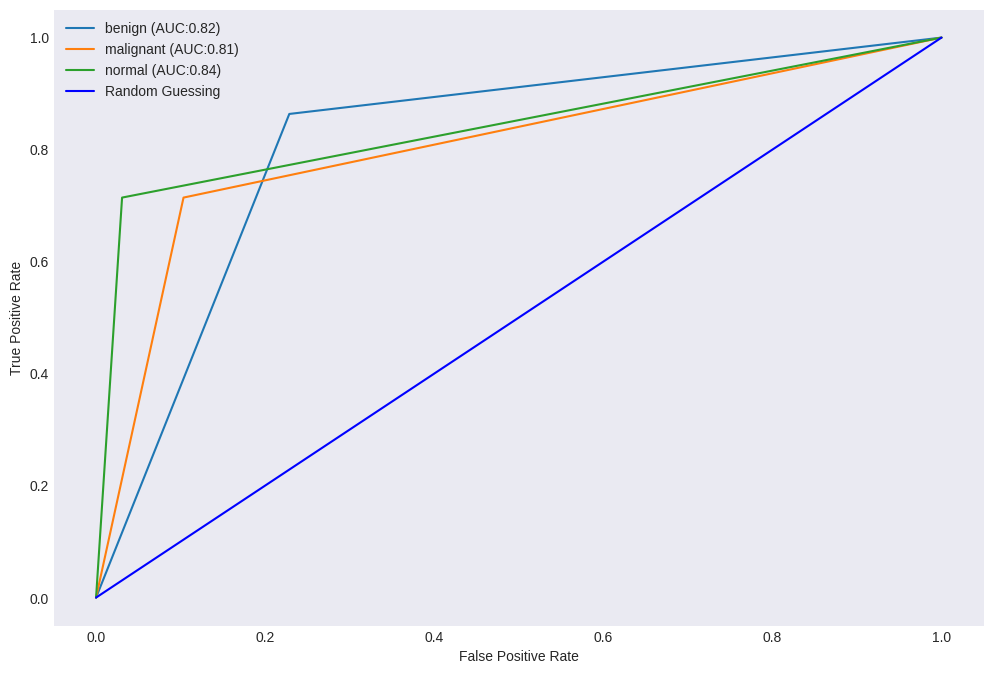

In [44]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score

fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target_names):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)

test_generator.reset()
y_pred = model.predict(test_generator, verbose = True)
y_pred = np.argmax(y_pred, axis=1)
multiclass_roc_auc_score(test_generator.classes, y_pred)

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

# **Save the Model**

In [52]:
model.save_weights('model_weights.h5')
model.save('model_predicancer.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [53]:
!cp -r '/content/drive/MyDrive/Capstone_Dataset/data/model_predicancer.h5' /content/drive/MyDrive/Capstone_Dataset